In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# What we will see in this notebook:
1. analysis on the dataset to understand each independent variable and its relationship with the target variable
2. necessary preprocessing of data
3. Application of  algorithms and select the best among them


# load libraries and read data

In [2]:
import warnings  
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Check for null values**

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Univariate Analysis of Data

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

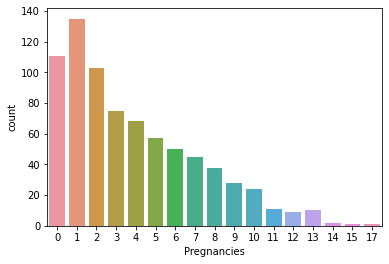

In [5]:
sns.countplot(data['Pregnancies'])

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

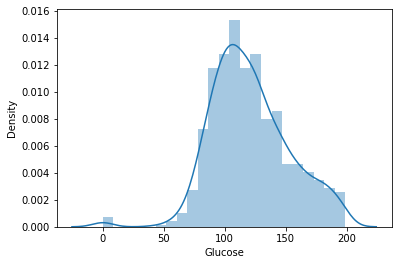

In [6]:
sns.distplot(data['Glucose'])

**Most Observations in Glucose column lies within the limits of 100-150**

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

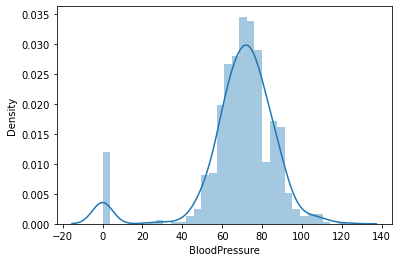

In [7]:
sns.distplot(data['BloodPressure'])

**Systolic Blood Pressure is also Normal**

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

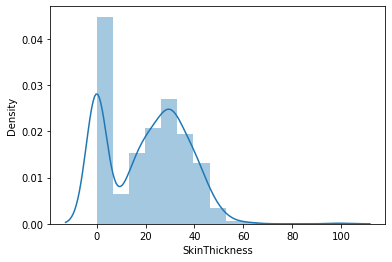

In [8]:
sns.distplot(data['SkinThickness'])

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

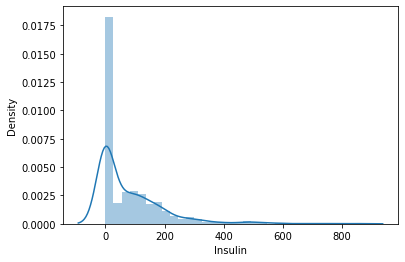

In [9]:
sns.distplot(data['Insulin'])

**Insulin column seems to be skewed. We need to check it further..**

<AxesSubplot:xlabel='BMI', ylabel='Density'>

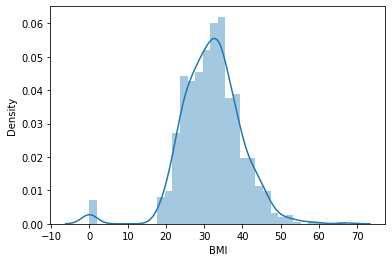

In [10]:
sns.distplot(data['BMI'])

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

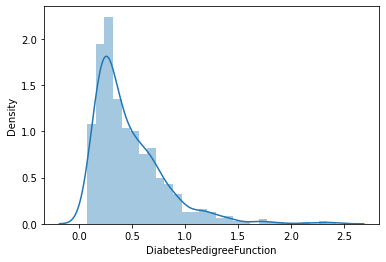

In [11]:
sns.distplot(data['DiabetesPedigreeFunction'])

**This column also seems to be skewed**

<AxesSubplot:xlabel='Age', ylabel='Density'>

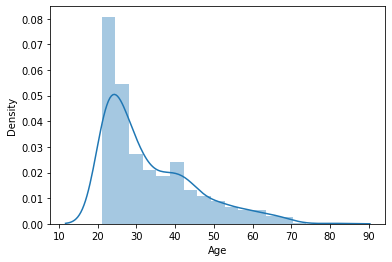

In [12]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Outcome', ylabel='count'>

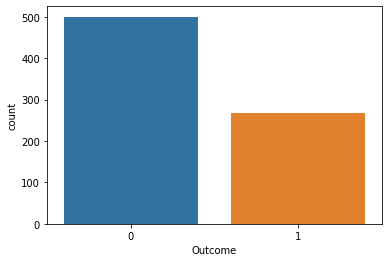

In [13]:
sns.countplot(data['Outcome'])

**Here we see imbalance in the Target variable and we need to treat it before applying any algorithm**

# Relationship between variables

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

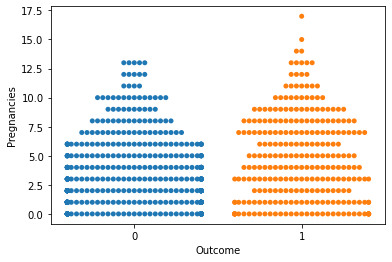

In [14]:
sns.swarmplot(x="Outcome", y="Pregnancies", data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

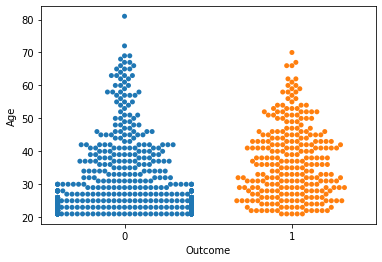

In [15]:
sns.swarmplot(x="Outcome", y="Age", data=data)

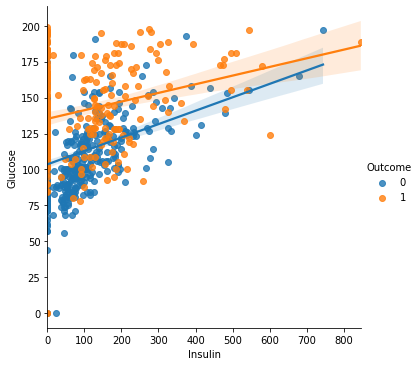

In [16]:
sns.lmplot(x='Insulin',y='Glucose', hue = 'Outcome',data = data)

**If normal levels of Insulin are maintained in blood then glucose level is also low**

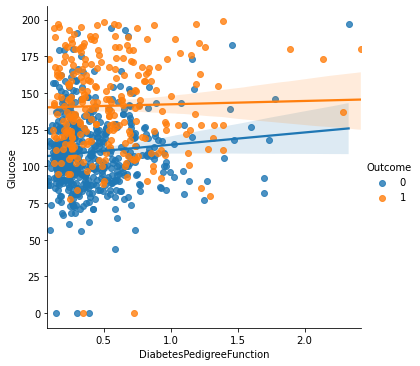

In [17]:
sns.lmplot(x='DiabetesPedigreeFunction',y='Glucose', hue = 'Outcome',data = data)

**Presence of Family history of diabetes can lead to rise inglucose levels but not necessarily. This can be seen in the above plot**

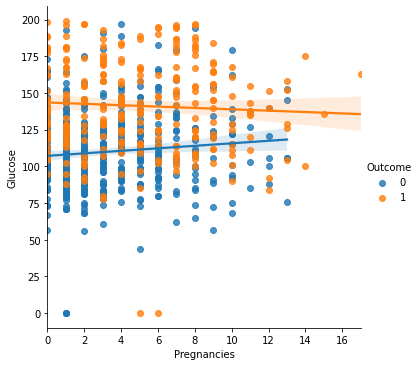

In [18]:
sns.lmplot(x='Pregnancies',y='Glucose', hue = 'Outcome',data = data)

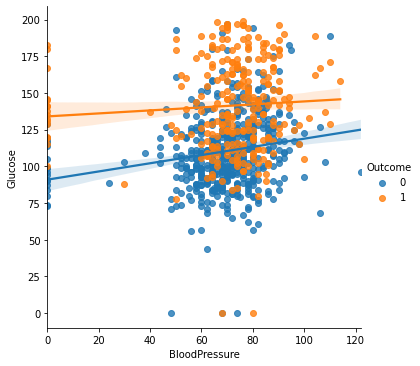

In [19]:
sns.lmplot(x='BloodPressure',y='Glucose',hue = 'Outcome',data = data)

**Long term High systolic blood pressure can increase glucose level**

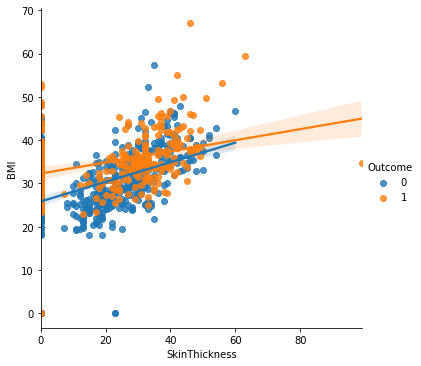

In [20]:
sns.lmplot(x='SkinThickness',y='BMI',hue = 'Outcome',data = data)

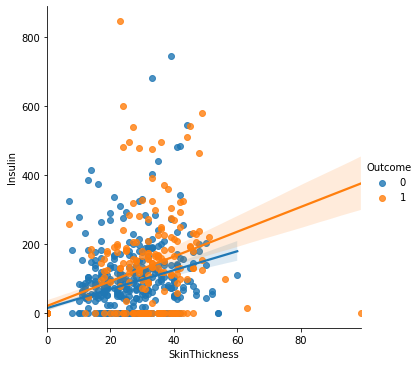

In [21]:
sns.lmplot(x='SkinThickness',y='Insulin',hue = 'Outcome',data = data)

**skin thickness is more if insulin content is more**

# What does the relationships tell us?
1. High levels of Insulin in blood post 2 hrs indiacte that glucose levels are high and can lead to diabetes
2. Presence of family history does not necessarily lead to diabetes but person can be at risk
3. High Systolic blood pressure in long term can also lead to increase in glucose level as we can observe it from graph
4. Skin thickness can increase BMI and in turn becomes tolerant to insulin action due to which insulin effect on glucose level can decrease. This in long term can lead to diabetes and therefore it is said that BMI should be maintained.
5. Insulin levels are increased in cases where skin thickness is more****

<AxesSubplot:>

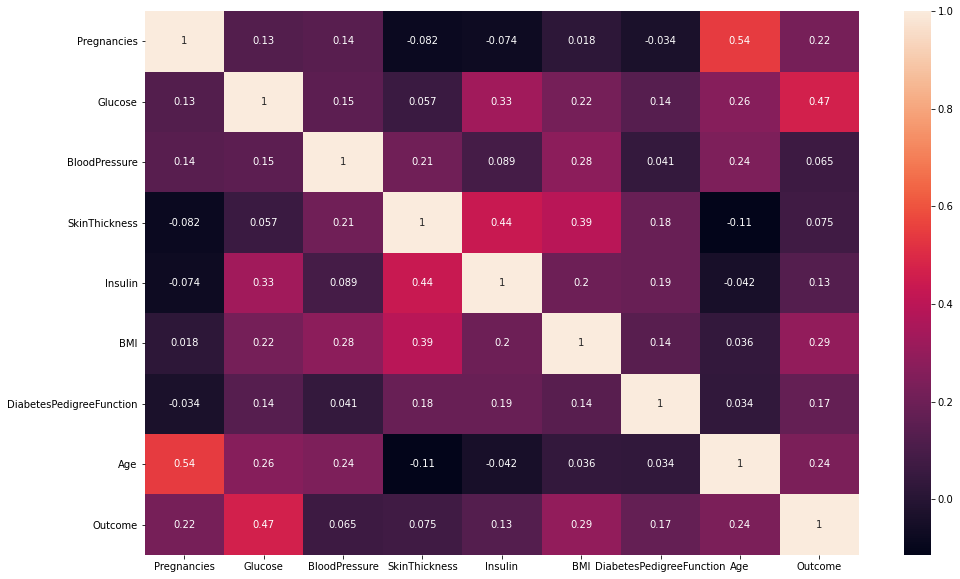

In [22]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(method='pearson'), annot=True)

# Building models

**Splitting into features and labels**

In [23]:
y=data['Outcome']
X=data.drop(columns=['Outcome'], inplace=True)

In [24]:
features = ['Age', 'Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction']
X=data[features]

**Splitting of data into train and test**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, shuffle=True)

**Logistic Regression (Baseline Model)**

In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [28]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       118
           1       0.76      0.46      0.57        74

    accuracy                           0.73       192
   macro avg       0.74      0.68      0.69       192
weighted avg       0.74      0.73      0.72       192



**so we get an accuracy of around 76% with precision of positive case as 72%. let's see if we can improve it**

**Since target variable is imbalanced, Applying smote for its treatment**

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
x_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

In [30]:
X_train = x_train_smote
X_test = x_test_smote
y_train = y_train_smote
y_test = y_test_smote

**Again predicting results after treatment of imbalance**

In [31]:
pred1=log_reg.predict(X_test)
pred1

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [32]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
classification_report = classification_report(y_test, pred1)
print(classification_report)

              precision    recall  f1-score   support

           0       0.61      0.91      0.73       118
           1       0.82      0.42      0.55       118

    accuracy                           0.66       236
   macro avg       0.71      0.66      0.64       236
weighted avg       0.71      0.66      0.64       236



**Though accuracy from the baseline model is little less but precision has improved very much. In this type of dataset where we need to be more precise about the early detection of positive case, accuracy becomes less important. Thus we need to understand what our model building purpose is.**

In [33]:
cm = confusion_matrix(y_test, pred1)
cm

array([[107,  11],
       [ 69,  49]])

In [34]:
tn = cm[0,0]
fp = cm[0,1]
tp = cm[1,1]
fn = cm[1,0]
accuracy  = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall    = tp / (tp + fn)
f1score  = 2 * precision * recall / (precision + recall)
print(f1score)

0.550561797752809


**ROC curve**

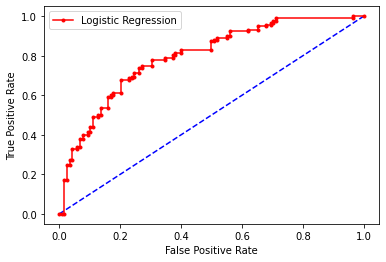

In [35]:
predicted_probab = log_reg.predict_proba(X_test)
predicted_probab = predicted_probab[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab)
from matplotlib import pyplot
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
pyplot.plot(fpr, tpr, marker='.', color='red', label='Logistic Regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()


**XGBoost classifier**

In [36]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train,y_train)
y_pred1 = model.predict(X_test)


[18:01:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
classification_report = classification_report(y_test, y_pred1)
print(classification_report)

              precision    recall  f1-score   support

           0       0.70      0.82      0.75       118
           1       0.78      0.64      0.71       118

    accuracy                           0.73       236
   macro avg       0.74      0.73      0.73       236
weighted avg       0.74      0.73      0.73       236



In [38]:
roc_auc_score(y_test, y_pred1)

0.7330508474576272

**This model is not performing well as compared to logistic regression**

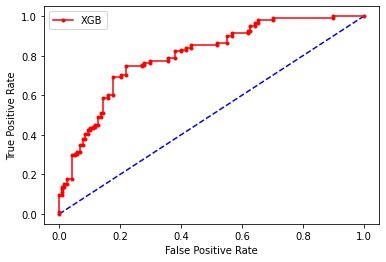

In [39]:
predicted_probab = model.predict_proba(X_test)
predicted_probab = predicted_probab[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab)
from matplotlib import pyplot
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
pyplot.plot(fpr, tpr, marker='.', color='red', label='XGB')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()


**Decision Tree Classifier**

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

In [41]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
classification_report = classification_report(y_test, dt_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.71      0.47      0.57       118
           1       0.61      0.81      0.69       118

    accuracy                           0.64       236
   macro avg       0.66      0.64      0.63       236
weighted avg       0.66      0.64      0.63       236



In [42]:
auc = roc_auc_score(y_test, dt_pred)
auc

0.6398305084745762

**This model also does not perform well as compared to logistic regression**

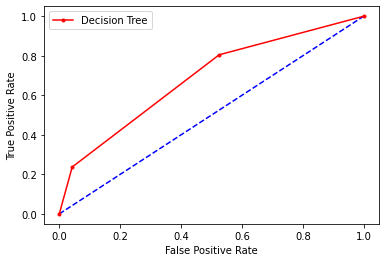

In [43]:

predicted_probab = dt_clf.predict_proba(X_test)
predicted_probab = predicted_probab[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab)
from matplotlib import pyplot
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
pyplot.plot(fpr, tpr, marker='.', color='red', label='Decision Tree')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()


**Random Forest**

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
rfc_predict = rfc.predict(X_test)
roc_auc_score(y_test, rfc_predict)

0.7372881355932204

In [46]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
classification_report = classification_report(y_test, rfc_predict)
print(classification_report)

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       118
           1       0.80      0.63      0.70       118

    accuracy                           0.74       236
   macro avg       0.75      0.74      0.73       236
weighted avg       0.75      0.74      0.73       236



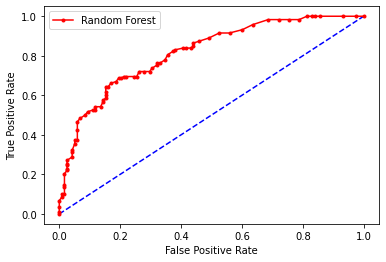

In [47]:
#RF
predicted_probab = rfc.predict_proba(X_test)
predicted_probab = predicted_probab[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab)
from matplotlib import pyplot
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
pyplot.plot(fpr, tpr, marker='.', color='red', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()



**From the above application of models we see that Random forest performs the best as its f1 score is the best among all the models.
**For this type of dataset, we need our model to perform well to identify positive case and thus accuracy becomes secondary metric of secondary importance**

**The performance of models can further be improved by Hyperparameter Tuning and we might get other model which can perform better than Logistic Regression**

**Work in progress....**

**If you find the notebook useful then provide feedback and do suggest for any sort of improvements which can be made. I am a beginner and would like to get any suggestions for further enhancement of my knowledge**